In [30]:
import matplotlib.pyplot as plt
import requests, pandas as pd, pycountry

In [31]:
countries = list(pycountry.countries)

for country in countries:
    print(country.name)

Aruba
Afghanistan
Angola
Anguilla
Åland Islands
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
French Southern Territories
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire, Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthélemy
Belarus
Belize
Bermuda
Bolivia, Plurinational State of
Brazil
Barbados
Brunei Darussalam
Bhutan
Bouvet Island
Botswana
Central African Republic
Canada
Cocos (Keeling) Islands
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo, The Democratic Republic of the
Congo
Cook Islands
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Curaçao
Christmas Island
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands (Malvinas)
France
Faroe Islands
Micronesia, Federated States of
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Gui

In [32]:
country_name = ['Germany', 'Spain', 'France', 'Italy']#, 'United States'

country_codes = [pycountry.countries.get(name=country).alpha_3 for country in country_name]
print(country_codes)

['DEU', 'ESP', 'FRA', 'ITA']


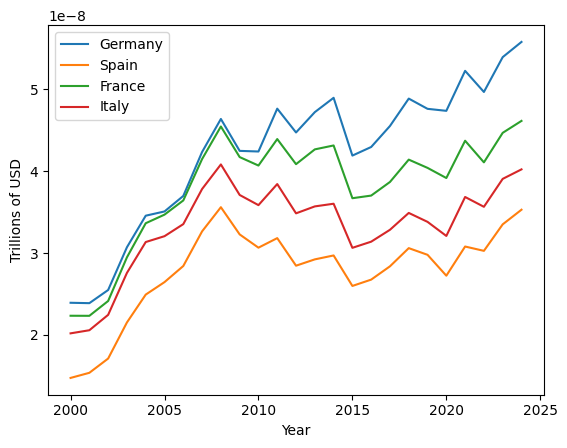

In [33]:
f, ax = plt.subplots()

for country in country_codes:
    start = 2000
    end = 2024

    indicator  = 'NY.GDP.PCAP.CD'
    
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}"
    params = {"date": f"{start}:{end}", "format": "json", "per_page": 1000}

    r = requests.get(url, params=params)
    r.raise_for_status()
    js = r.json()
    js
    records = [(int(item['date']), item['value']) for item in js[1] if item.get('value') is not None]
    df = pd.DataFrame(records, columns=["year", "gdp"]).set_index("year").sort_index()

    ax.plot(df.index, df['gdp'] / 1_000_000_000_000)
    # ax.set_title(f"GDP of {name.title()} (in Trillions USD)")   
    ax.set_ylabel("Trillions of USD")
    ax.set_xlabel("Year")
    
    ax.legend(country_name)
plt.show()


## Use the following link to explore more indicators:  
https://data.worldbank.org/indicator

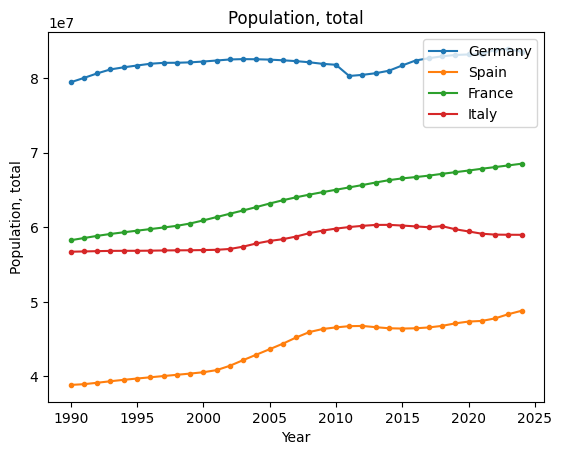

In [34]:
f, ax = plt.subplots()

for country in country_codes:
    start = 1990
    end = 2024

    indicator  = 'SP.POP.TOTL' 
    # name = 'Central government debt, total (% of GDP)'
    
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}"
    params = {"date": f"{start}:{end}", "format": "json", "per_page": 1000}

    r = requests.get(url, params=params)
    r.raise_for_status()
    js = r.json()
    name = js[1][0]['indicator']['value']
    records = [(int(item['date']), item['value']) for item in js[1] if item.get('value') is not None]
    df = pd.DataFrame(records, columns=["year", "value"]).set_index("year").sort_index()

    ax.plot(df.index, df['value'], 'o-', markersize=3)
    ax.set_title(name)   
    ax.set_ylabel(name)
    ax.set_xlabel("Year")
    
    ax.legend(country_name)
plt.show()


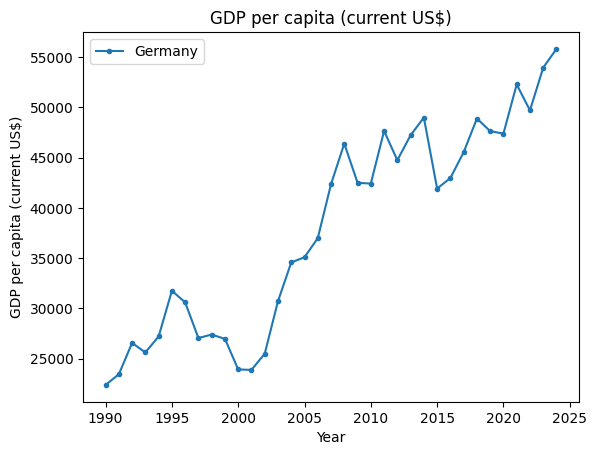

In [41]:
country = 'DEU'  # Germany

f, ax = plt.subplots()

start = 1990
end = 2024

# indicator  = 'SP.POP.TOTL' 
indicator  = 'NY.GDP.PCAP.CD' 

url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}"
params = {"date": f"{start}:{end}", "format": "json", "per_page": 1000}

r = requests.get(url, params=params)
r.raise_for_status()
js = r.json()
name = js[1][0]['indicator']['value']
records = [(int(item['date']), item['value']) for item in js[1] if item.get('value') is not None]
df = pd.DataFrame(records, columns=["year", "value"]).set_index("year").sort_index()

ax.plot(df.index, df['value'], 'o-', markersize=3)
ax.set_title(name)   
ax.set_ylabel(name)
ax.set_xlabel("Year")

ax.legend(country_name)
plt.show()

In [ ]:
def get_value(country, indicator, start=1990, end=2024):
    url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}"
    params = {"date": f"{start}:{end}", "format": "json", "per_page": 1000}
    